# Import packages and Pre-define func

In [1]:
import csv
import numpy as np
import pandas as pd
import pip
import matplotlib.pyplot as plt
import numpy as np

def pip_install(module):
    pip.main(['install', module])

# pip_install('scipy')
# pip_install('matplotlib')

In [2]:
def prepare_data():
    raw_data = pd.read_csv('../../data/trade.csv')
    # count the number of vipno and pluno
    vip_set = set(raw_data.vipno)
    n_vip = len(vip_set)
    plu_set = set(raw_data.pluno)
    n_plu = len(plu_set)
    
    # construct the data matrix of the trade
    vipno = list(vip_set)
    pluno = list(plu_set)
    trade_mat = pd.DataFrame(np.zeros([n_plu, n_vip]), index=pluno, columns=vipno)
    l = len(raw_data)
    for i in range(l):
        p = raw_data.loc[i, 'pluno']
        v = raw_data.loc[i, 'vipno']
        a = raw_data.loc[i, 'amt']
        trade_mat.at[p, v] += a
        
    # apply round
    trade_mat.apply(np.round)
    trade_mat = trade_mat.astype('int64') # it depends
    return trade_mat, vipno, pluno, n_vip, n_plu

# Clustering

In [4]:
# get the data for clustering
from sklearn.preprocessing import StandardScaler

trade_mat, vipno, pluno, n_vip, n_plu = prepare_data()
X = trade_mat.values
X = X.transpose()
# standarize
scaler = StandardScaler()
X = scaler.fit_transform(X)
# print(len(X))

/Users/jiangyukai/Developer/DataMing-HW/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Silhouette coefficient - k cluster plot

In [5]:
from scipy.interpolate import interp1d
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def cluster_eva(X, k):
    estimator = GaussianMixture(n_components=k, covariance_type='tied', max_iter=20, random_state=0)
    estimator.fit(X)
    cluster_labels = estimator.predict(X)
    cluster_num = len(set(cluster_labels))
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_components =", k,
          "The average silhouette_score is :", silhouette_avg)
    print("cluster number =", cluster_num)
    return silhouette_avg, cluster_labels

In [6]:
ks = []
y = []
labels = []
for k in range(2, 12):
    ks.append(k)
    sil_avg, cluster_labels = cluster_eva(X, k)
    y.append(sil_avg)
    labels.append(cluster_labels)

For n_components = 2 The average silhouette_score is : 0.24586554027341234
cluster number = 2
For n_components = 3 The average silhouette_score is : 0.24802369177453215
cluster number = 3
For n_components = 4 The average silhouette_score is : 0.2502812416466154
cluster number = 4
For n_components = 5 The average silhouette_score is : 0.25086962650930794
cluster number = 5
For n_components = 6 The average silhouette_score is : 0.2521480135564458
cluster number = 6
For n_components = 7 The average silhouette_score is : 0.2525749228330828
cluster number = 7
For n_components = 8 The average silhouette_score is : -0.2168357636354869
cluster number = 8
For n_components = 9 The average silhouette_score is : -0.21435192934552222
cluster number = 9
For n_components = 10 The average silhouette_score is : -0.21352982257980002
cluster number = 10
For n_components = 11 The average silhouette_score is : -0.2123280534320084
cluster number = 11


In [16]:
# print(len(labels), len(ks), len(y))
# ks = []
# for k in range(2,13):
#     ks.append(k)
# print(len(ks))

11 0 11
11


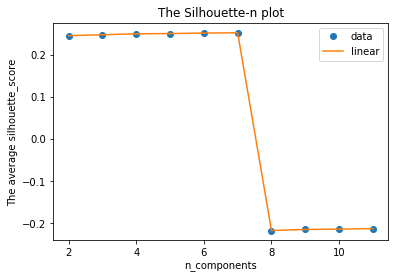

In [7]:
f = interp1d(ks, y)

xnew = ks.copy()
plt.plot(ks, y, 'o', xnew, f(xnew), '-')
plt.legend(['data', 'linear'], loc='best')
plt.xlabel("n_components")
plt.ylabel("The average silhouette_score")
plt.title("The Silhouette-n plot")
plt.show()

In [29]:
# print(labels[8])

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 9 6 6 6 6 6 6 6 6 6 6 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 6 6 6 6
 6 6 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 6 6 6 6 5 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


# (a) Compare with KMeans

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=10)
y_kmeans = kmeans.fit_predict(X)
y_GMM = labels[ks.index(2)]

In [17]:
# since there are only 2 clusters, I just make a simple comparison
corr = 0
for i, y1 in enumerate(y_kmeans):
    if y1 == y_GMM[i]:
        corr += 1
print("The accuracy for KMeans = ", corr / float(len(y_kmeans)))

The accuracy for KMeans =  0.9932885906040269


# (b) Compare with DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

y_DBSCAN = DBSCAN(eps=130, min_samples=20).fit_predict(X)
cluster_num = len(set(y_DBSCAN))

y_GMM = labels[ks.index(cluster_num)]
# print(y_GMM)

In [19]:
y_DBSCAN[y_DBSCAN == -1] = 1 # change the cluster labels
# since there are only 2 clusters, I just make a simple comparison

corr = 0
for i, y1 in enumerate(y_DBSCAN):
    if y1 == y_GMM[i]:
        corr += 1
print("The accuracy for DBSCAN = ", corr / float(len(y_DBSCAN)))

The accuracy for DBSCAN =  0.9932885906040269


# (c) Test with LSH

In [20]:
from lshash.lshash import LSHash

e = 0.01
lsh = LSHash(round(n_vip * e), n_plu)
for v in vipno:
    feature = list(trade_mat[v])
    lsh.index(feature, extra_data=v)

In [25]:
import random

def lsh_test():
    correct = 0
    # pick up a random vipno
    pick_vip = random.randint(1, n_vip)
    cluster_label = labels[ks.index(7)] 
    pick_vipno = vipno[pick_vip]
    cluster1 = cluster_label[pick_vip]
    print("Pick up a vip: {0}, cluster = {1}".format(pick_vipno, cluster1))

    # lsh query and write the results
    candi = lsh.query(list(trade_mat[pick_vipno]))
    l = len(candi)
#     print(l)
    for i, item in enumerate(candi[1:]):
        dist = item[1]
        feature = list(item[0][0])
        v = item[0][1]
        lsh_pair_no = vipno.index(v)
        cluster2 = cluster_label[lsh_pair_no]
#         print("for vip {0}: distance = {1}, cluster = {2}".format(v, dist, cluster2))
        if cluster2 == cluster1:
            correct += 1
    print("accuracy =", correct, '/', l)
    return correct/float(l)

In [26]:
correctness = 0
times = 50
for i in range(times):
    print("Time #", i+1)
    try:
        correctness += lsh_test()
    except Exception as e:
        continue
print("The total average accuracy is =", correctness / times)

Time # 1
Pick up a vip: 1592014001436, cluster = 0
accuracy = 35 / 39
Time # 2
Pick up a vip: 1595160029163, cluster = 0
accuracy = 35 / 39
Time # 3
Pick up a vip: 1590151403106, cluster = 0
accuracy = 20 / 21
Time # 4
Pick up a vip: 2900000394193, cluster = 0
accuracy = 29 / 30
Time # 5
Pick up a vip: 1595160183780, cluster = 0
accuracy = 67 / 69
Time # 6
Pick up a vip: 1595151110818, cluster = 0
accuracy = 16 / 17
Time # 7
Pick up a vip: 2900000764651, cluster = 0
accuracy = 29 / 30
Time # 8
Pick up a vip: 1591012723487, cluster = 0
accuracy = 32 / 33
Time # 9
Pick up a vip: 2900000667914, cluster = 0
accuracy = 53 / 55
Time # 10
Pick up a vip: 2900003113500, cluster = 0
accuracy = 29 / 30
Time # 11
Pick up a vip: 1591012046364, cluster = 0
accuracy = 35 / 39
Time # 12
Pick up a vip: 2900000849273, cluster = 0
accuracy = 32 / 34
Time # 13
Pick up a vip: 2900002512205, cluster = 0
accuracy = 29 / 30
Time # 14
Pick up a vip: 1591012264638, cluster = 0
accuracy = 53 / 55
Time # 15
Pick 